# Feed Forward Neural Network 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


You need to have these three files to run all the cells in this notebook
1. ITClust train dataset
2. ITClust test dataset
3. FlowGMM codebase zip 

In [ ]:
it_clust_dataset_train = '/content/drive/MyDrive/SCC/ItClust/tutorial/data/pancreas/Bh.h5ad'
it_clust_dataset_test = '/content/drive/MyDrive/SCC/ItClust/tutorial/data/pancreas/smartseq2.h5ad'

In [ ]:
!unzip /content/drive/MyDrive/flowgmm.zip 

Archive:  /content/drive/MyDrive/flowgmm.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/bin/
  inflating: __MACOSX/data/._bin     
   creating: data/labels/
  inflating: __MACOSX/data/._labels  
   creating: data/toy_datasets/
  inflating: __MACOSX/data/._toy_datasets  
   creating: data/nlp_datasets/
  inflating: __MACOSX/data/._nlp_datasets  
  inflating: data/bin/link_cifar10_val.sh  
  inflating: data/bin/unpack_cifar100.py  
  inflating: data/bin/prepare_svhn.sh  
  inflating: data/bin/prepare_mnist.sh  
  inflating: data/bin/unpack_mnist.py  
  inflating: data/bin/link_cifar10_train.sh  
  inflating: data/bin/unpack_svhn.py  
  inflating: data/bin/link_cifar100_val.sh  
  inflating: data/bin/prepare_cifar100.sh  
  inflating: data/bin/prepare_notmnist.sh  
  inflating: data/bin/link_train_val_cifar100.py  
  inflating: data/bin/unpack_cifar10.py  
  inflating: data/bin/l

In [ ]:
!pip install -e .
!pip install timm==0.3.2 torch==1.8.1 torchvision 
!pip install scanpy normflows
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/mfinzi/olive-oil-ml to /tmp/pip-install-hftecf3i/olive-oil-ml_d5b1ceb1d055461ab9d19389347bef65
  Running command git clone --filter=blob:none --quiet https://github.com/mfinzi/olive-oil-ml /tmp/pip-install-hftecf3i/olive-oil-ml_d5b1ceb1d055461ab9d19389347bef65
  Resolved https://github.com/mfinzi/olive-oil-ml to commit 32978a77414575fad65b916e75374f9e16e99ede
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for olive-oil-ml: filename=olive_oil_ml-0.1.1-py3-none-any.whl size=89861 sha256=af468a5cca3457f726f3fee1e1ade1efa253f76da792ce7265f6aba82e602492
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mseyjz

In [ ]:
!python3 experiments/train_flows/flowgmm_tabular_new.py --trainer_config "{'unlab_weight':.6}" --net_config "{'k':1024,'coupling_layers':7,'nperlayer':1}" --network RealNVPTabularWPrior --trainer SemiFlow --num_epochs 200 --dataset AG_News --lr 3e-4 --train 200

{'dataset': <class 'flow_ssl.data.nlp_datasets.AG_News'>, 'network': <function RealNVPTabularWPrior at 0x7fa8ecd62c10>, 'num_epochs': 200, 'bs': 5000, 'lr': 0.0003, 'optim': <class 'torch.optim.adamw.AdamW'>, 'device': 'cuda', 'trainer': SemiFlow, 'split': {'train': 200, 'val': 5000}, 'net_config': {'k': 1024, 'coupling_layers': 7, 'nperlayer': 1}, 'opt_config': {'weight_decay': 1e-05}, 'trainer_config': {'log_dir': '/root/tb-experiments/UCI/', 'log_args': {'minPeriod': 0.1, 'timeFrac': 0.3}, 'unlab_weight': 0.6}, 'save': False}
17138
17138
2394
Pairwise dists: [[ 0.         42.92540479 43.31075301 43.06511015 43.86779931 42.33163923
  43.44105921 43.01879223 43.00383248 43.47666371 44.01546757 43.35264233
  43.04800411 43.12953236]
 [42.92540479  0.         42.16372682 42.45021117 42.49898229 42.99183522
  42.68590866 42.28304751 43.13513897 42.56788466 43.38673549 42.61953885
  42.63064442 42.81877861]
 [43.31075301 42.16372682  0.         43.12782012 43.16773394 41.50967536
  42.660

In [ ]:
import pickle

In [ ]:
import scanpy as sc
import os
from numpy.random import seed
# from tensorflow import set_random_seed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
mapping = {'gamma': 0, 'activated_stellate': 1, 'schwann': 2, 'ductal': 3, 'delta': 4, 'acinar': 5, 'beta': 6, 'mast': 7, 'F': 8, 'endothelial': 9, 'quiescent_stellate': 10, 'epsilon': 11, 'macrophage': 12, 'alpha': 13}
with open("drive/MyDrive/Metrics.pkl", "rb") as f:
  D = pickle.load(f)

In [ ]:
rev = list(mapping.keys())
print(len(rev))
new_D = {}
for i in D:
  print(i)
  try:
    new_D[rev[int(i.split("_")[-1])]] = D[i]
  except:
    continue

14
val_bpd
Train_Acc
val_Acc
test_Acc
class_Acc_0
class_Acc_1
class_Acc_2
class_Acc_3
class_Acc_4
class_Acc_5
class_Acc_6
class_Acc_7
class_Acc_8
class_Acc_9
class_Acc_10
class_Acc_11
class_Acc_12
class_Acc_13


In [ ]:
del new_D['F']

In [ ]:
plt.rcParams["figure.figsize"] = (20,5.5)

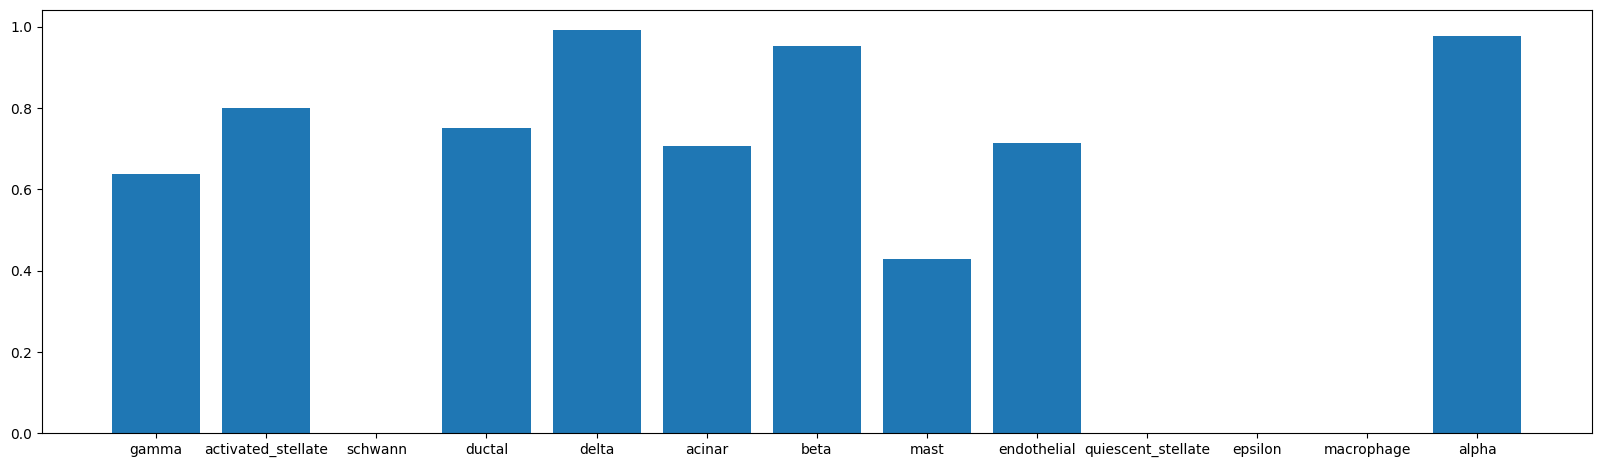

In [ ]:
plt.bar(range(len(new_D)), list(new_D.values()))
plt.xticks(range(len(new_D)), list(new_D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()


In [ ]:
df = pd.DataFrame(columns = list(best_results.keys()))

In [ ]:
df.append(best_results, ignore_index = True)

<ipython-input-20-4eaf5151781c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(best_results, ignore_index = True)


,val_bpd,Train_Acc,val_Acc,test_Acc,class_Acc_0,class_Acc_1,class_Acc_2,class_Acc_3,class_Acc_4,class_Acc_5,class_Acc_6,class_Acc_7,class_Acc_9,class_Acc_10,class_Acc_11,class_Acc_12,class_Acc_13
0,8.185334,0.976691,0.973162,0.863826,0.892019,0.709091,0.0,0.966216,0.968504,0.771277,0.827922,0.0,0.47619,0.0,0.0,0.0,0.87004


In [ ]:
df.plot.bar()

TypeError: ignored

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
# from fancyimpute import IterativeImputer

In [ ]:
adata_train=sc.read(it_clust_dataset_train)
adata_test=sc.read(it_clust_dataset_test)

In [ ]:
len(adata_train.obs["celltype"])

8569

In [ ]:
#/Utils/preprocess.py
def preprocess(adata_test, min_genes = 200, min_cells = 20, target_sum = 1e6, n_top_genes = 3000, max_value = 10, get_hvgs=False, scale_and_hvgs = False):
        """
        INPUT:
        file_path: path to .h5ad containing scRNA-seq
        """
        ## convert to h5ad
        # adata_test = sc.AnnData(genes, labels)

        ## make var names unique
        adata_test.obs_names_make_unique()
        adata_test.var_names_make_unique()

    ## filter cells with count less than 200
        sc.pp.filter_cells(adata_test, min_genes=min_genes)

        ## filter genes with count less than 20
        sc.pp.filter_genes(adata_test, min_cells=min_cells)

        ## normalise data
        sc.pp.normalize_total(adata_test, target_sum=target_sum)

        ## LogNormalise
        if not(scale_and_hvgs):
                return {'data':adata_test}

        if get_hvgs:
                ## Get HVGS
                sc.pp.log1p(adata_test)
                sc.pp.highly_variable_genes(adata_test, n_top_genes = n_top_genes)
                adata_test = adata_test[:, adata_test.var.highly_variable]

                ## scale data
                sc.pp.scale(adata_test, max_value=max_value)
                return {'data' : adata_test, 'hvg': adata_test.var.highly_variable}

        ## scale data
        sc.pp.scale(adata_test, max_value=max_value)
        return {'data':adata_test}

In [ ]:
print("Starting preprocessing...")
train_dic = preprocess(adata_train, min_cells=20,min_genes=50, get_hvgs = True, scale_and_hvgs = True)
test_dic = preprocess(adata_test, min_cells=0, min_genes=0)

Starting preprocessing...


In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
print(len(intersection(adata_train.var.index, adata_test.var.index)))
list(adata_train.var.index)[0]

14260


'A1BG'

In [ ]:
col= [i for i in train_dic['hvg'].index]
print(col)

['A2M', 'A4GALT', 'AADAC', 'AATK', 'ABCA4', 'ABCA8', 'ABCB1', 'ABCC3', 'ABCC8', 'ABCC9', 'ABHD15', 'ABHD2', 'ABHD4', 'ABI3', 'ABI3BP', 'ABL1', 'ABL2', 'ABTB2', 'ACAN', 'ACE', 'ACKR3', 'ACOXL', 'ACP5', 'ACRC', 'ACSL1', 'ACSL4', 'ACSL5', 'ACSS3', 'ACTA1', 'ACTA2', 'ACTB', 'ACTC1', 'ACVRL1', 'ADA', 'ADAM12', 'ADAM19', 'ADAM8', 'ADAMDEC1', 'ADAMTS1', 'ADAMTS12', 'ADAMTS14', 'ADAMTS2', 'ADAMTS4', 'ADAMTS5', 'ADAMTS7', 'ADAMTS9', 'ADAMTSL2', 'ADAP2', 'ADCY1', 'ADCY2', 'ADCY3', 'ADCY4', 'ADCY5', 'ADCY7', 'ADCY9', 'ADCYAP1', 'ADD2', 'ADD3', 'ADGRA2', 'ADGRD1', 'ADGRE2', 'ADGRF1', 'ADGRF5', 'ADGRG1', 'ADGRL2', 'ADGRL4', 'ADH1C', 'ADH6', 'ADIRF', 'ADM', 'ADM5', 'ADNP2', 'ADORA1', 'ADORA3', 'ADRA2C', 'ADRB2', 'AEBP1', 'AEN', 'AFAP1', 'AFAP1L1', 'AFAP1L2', 'AFF2', 'AGAP1', 'AGER', 'AGR2', 'AGR3', 'AGRN', 'AGT', 'AGTR1', 'AGXT', 'AHNAK', 'AHR', 'AHRR', 'AIF1', 'AIM1', 'AJAP1', 'AK4', 'AK8', 'AKAP12', 'AKAP7', 'AKNA', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'ALB', 'ALCAM', 'ALDH1A1', 'ALD

In [ ]:
train_adata_pp =  train_dic['data']
print(train_dic['hvg'])
test_adata_pp =  test_dic['data'][:, intersection(col, test_dic['data'].var.index)]
train_adata_pp = train_dic['data'][:, intersection(col, train_dic['data'].var.index)]

index
A2M       True
A4GALT    True
AADAC     True
AATK      True
ABCA4     True
          ... 
ZSCAN9    True
ZSWIM3    True
ZSWIM4    True
ZYX       True
pk        True
Name: highly_variable, Length: 3000, dtype: bool


In [ ]:
train_df = train_adata_pp.to_df()
test_df = test_adata_pp.to_df()

In [ ]:
## taking common genes
print("Taking common genes...")
final_columns = list(set(train_df.columns).intersection(set(test_df.columns)))
print('Common columns', len(final_columns))
final_columns = [i for i in final_columns if i != 'celltype'] 
train_df = train_df[final_columns]
test_df = test_df[final_columns]

Taking common genes...
Common columns 2975


In [ ]:
y_train = train_adata_pp.obs.celltype.to_list()
y_test = test_adata_pp.obs.celltype.to_list()

In [1]:
print(len(y_train))
print(len(y_test))

NameError: name 'y_train' is not defined

In [ ]:
freq = {}
for item in y_test:
    if (item in freq):
        freq[item] += 1
    else:
        freq[item] = 1
mapping = {'gamma': 0, 'activated_stellate': 1, 'schwann': 2, 'ductal': 3, 'delta': 4, 'acinar': 5, 'beta': 6, 'mast': 7, 'epsilon': 8, 'endothelial': 9, 'quiescent_stellate': 10, 'epsilon': 11, 'macrophage': 12, 'alpha': 13}


In [ ]:
print(freq)

{'gamma': 213, 'acinar': 188, 'alpha': 1008, 'delta': 127, 'beta': 308, 'ductal': 444, 'endothelial': 21, 'activated_stellate': 55, 'schwann': 2, 'mast': 7, 'macrophage': 7, 'epsilon': 8, 'quiescent_stellate': 6}


In [ ]:
X_train = train_df.to_numpy()
X_test = test_df.to_numpy()

In [ ]:
import pickle

In [ ]:
%ls

drive/  sample_data/


In [ ]:
with open('drive/MyDrive/X_train.pkl', 'wb') as fh:
   pickle.dump(X_train, fh)

with open('drive/MyDrive/X_test.pkl', 'wb') as fh:
   pickle.dump(X_test, fh)


In [ ]:
with open('y_test.pkl', 'wb') as fh:
   pickle.dump(y_test, fh)
with open('y_train.pkl', 'wb') as fh:
   pickle.dump(y_train, fh)

In [ ]:
labels = set(y_train)
mapping = {}
cnt = 0
for lab in set(y_train):
  if lab in mapping:
    continue
  mapping[lab] = cnt
  cnt += 1


In [ ]:
print(mapping)

{'mast': 0, 'gamma': 1, 'endothelial': 2, 'schwann': 3, 'ductal': 4, 't_cell': 5, 'macrophage': 6, 'alpha': 7, 'epsilon': 8, 'activated_stellate': 9, 'beta': 10, 'delta': 11, 'quiescent_stellate': 12, 'acinar': 13}


In [ ]:
y_test_lab = []
for i in y_test:
  if i in mapping:
    y_test_lab.append(mapping[i])
  else:
    y_test_lab.append(0)

In [ ]:
y_test = np.array(y_test_lab)

In [ ]:
y_train_lab = []
for i in y_train:
  if i in mapping:
    y_train_lab.append(mapping[i])
  else:
    y_train_lab.append(0)

In [ ]:
y_train = np.array(y_train_lab)

In [ ]:
y_train

array([5, 5, 5, ..., 6, 6, 3])

In [ ]:
def convert(X, y):
  X_train_lab = [[] for i in range(len(mapping) + 1 )]
  for i in range(len(y_train)):
    lab = y_train[i]
    if lab in mapping:
      X_train_lab[mapping[lab]].append(X_train[i,:])
    else:
      X_train_lab[-1].append(X_train[i,:])
  for i in range(len(mapping)):
    if len(X_train_lab[i]) == 0:
      continue
    X_train_lab[i] = np.array(X_train_lab[i])
  return X_train_lab

In [ ]:
X_train_lab = convert(X_train, y_train)
X_test_lab = convert(X_test, y_test)

In [ ]:
X_train_lab[0].shape

(25, 14260)

In [ ]:
# count of celltypes in test data
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'acinar': 188,
 'activated_stellate': 55,
 'alpha': 1008,
 'beta': 308,
 'delta': 127,
 'ductal': 444,
 'endothelial': 21,
 'epsilon': 8,
 'gamma': 213,
 'macrophage': 7,
 'mast': 7,
 'quiescent_stellate': 6,
 'schwann': 2}

In [ ]:
# count of celltypes in train data
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'acinar': 958,
 'activated_stellate': 284,
 'alpha': 2326,
 'beta': 2525,
 'delta': 601,
 'ductal': 1077,
 'endothelial': 252,
 'epsilon': 18,
 'gamma': 255,
 'macrophage': 55,
 'mast': 25,
 'quiescent_stellate': 173,
 'schwann': 13,
 't_cell': 7}